## K-Means 군집 모델 및 Silhouette score

### 데이터 셋(Dataset) 및 전처리



* 데이터셋 : clustering_dataset.csv

In [43]:
# 필요한 라이브러리 임포트

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [44]:
#  데이터셋 가져오기
df_k = pd.read_csv('../data/clustering_dataset.csv')
df_k.drop("Unnamed: 0", axis=1, inplace=True)

# 데이터셋 확인
df_k

,x1,x2
0,-5.673888,9.134580
1,7.783390,-7.145758
2,7.532874,-4.235851
3,-1.497504,9.437434
4,-2.912560,6.562741
...,...,...
195,-1.438523,9.690181
196,-0.252837,10.182634
197,7.415080,-4.526361
198,-1.795357,8.488310


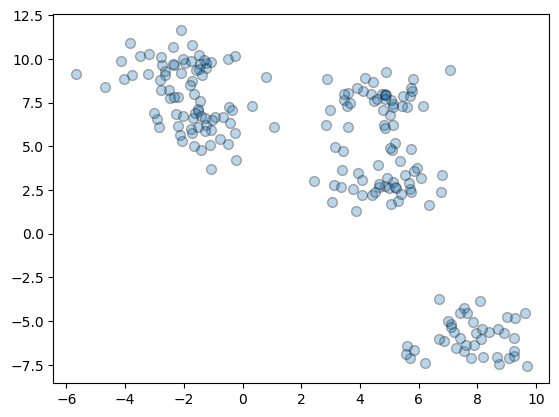

In [45]:
# 데이터셋 시각화
plt.scatter(df_k.x1, df_k.x2, s=50, edgecolor='k', alpha=0.3);

In [46]:
# 군집의 개수(k=2, 3, ..., 10)를 변화시키면서 해군집별 밀집도(WCSS, inertia) 확인하기
# sklearn의 KMeans class를 활용

k_list = range(2, 11)        
inertias = []

for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_k)
    inertias.append(kmeans.inertia_)

# 군집의 밀집도 출력
for i, each in enumerate(inertias, start=2):
    print(f"k={i}, inertia={each:.4f}")

k=2, inertia=3030.5352
k=3, inertia=1039.9934
k=4, inertia=614.0820
k=5, inertia=383.0953
k=6, inertia=346.5481
k=7, inertia=315.5863
k=8, inertia=287.4383
k=9, inertia=255.4356
k=10, inertia=228.7065


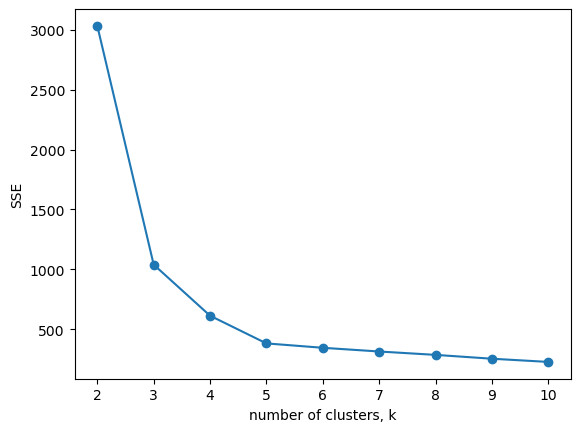

In [47]:
# k 와 inertias 시각화하기
plt.plot(k_list, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(k_list)
plt.show()

In [48]:
# 군집의 수(k)를 5로 설정하고 KMeans 메소드 적용하여 군집화
data = df_k.values
model5 = KMeans(n_clusters=5, random_state=0)
model5.fit(data)

# 각 군집의 중심 좌표 구하기
centers =model5.cluster_centers_

# 각 데이터 샘플에 대해 소속한 군집 번호 연결
df_k = pd.concat([df_k, pd.Series(model5.labels_)], axis=1)
df_k.rename(columns={0:'cluster(k=5)'}, inplace=True)

# 데이터셋과 군집 번호 확인
df_k                 

,x1,x2,cluster(k=5)
0,-5.673888,9.134580,1
1,7.783390,-7.145758,2
2,7.532874,-4.235851,2
3,-1.497504,9.437434,1
4,-2.912560,6.562741,4
...,...,...,...
195,-1.438523,9.690181,1
196,-0.252837,10.182634,1
197,7.415080,-4.526361,2
198,-1.795357,8.488310,1


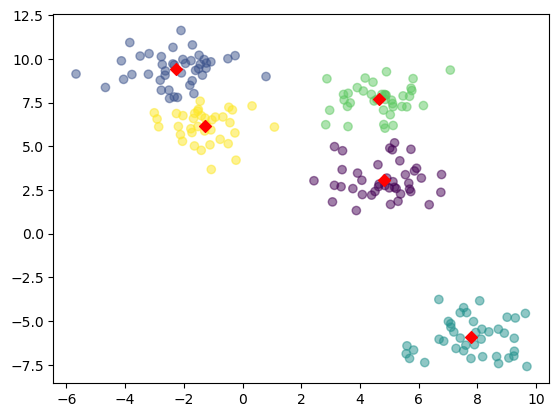

In [49]:
# 5개 군집 산점도로 확인하기
plt.scatter(df_k.x1, df_k.x2, c=df_k['cluster(k=5)'], alpha=0.5);
plt.scatter(centers[:,0], centers[:, 1], marker='D', color='r');

In [50]:
# 군집별 갯수 확인
df_k["cluster(k=5)"].value_counts()

1    43
0    41
2    40
3    39
4    37
Name: cluster(k=5), dtype: int64

In [51]:
# k = 3


In [52]:
# k = 3
data = df_k.values
model3 = KMeans(n_clusters=3, random_state=0)
model3.fit(data)

centers =model3.cluster_centers_


In [53]:

df_k = pd.concat([df_k, pd.Series(model3.labels_)], axis=1)
df_k.rename(columns={0:'cluster(k=3)'}, inplace=True)
df_k
                  


,x1,x2,cluster(k=5),cluster(k=3)
0,-5.673888,9.134580,1,1
1,7.783390,-7.145758,2,2
2,7.532874,-4.235851,2,2
3,-1.497504,9.437434,1,1
4,-2.912560,6.562741,4,1
...,...,...,...,...
195,-1.438523,9.690181,1,1
196,-0.252837,10.182634,1,1
197,7.415080,-4.526361,2,2
198,-1.795357,8.488310,1,1


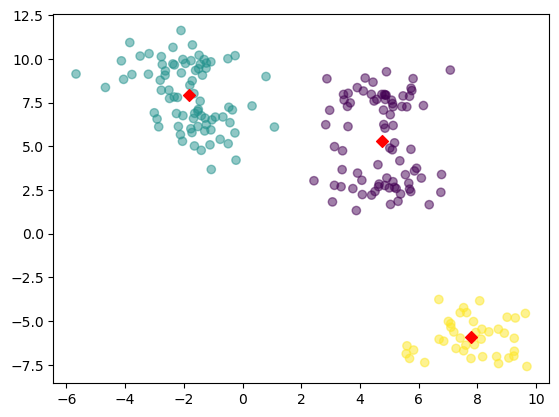

In [54]:
# 3개 군집 산점도로 확인하기
plt.scatter(df_k.x1, df_k.x2, c=df_k["cluster(k=3)"], alpha=0.5);
plt.scatter(centers[:,0], centers[:, 1], marker='D', color='r');

In [55]:
# 군집별 갯수 확인
df_k["cluster(k=3)"].value_counts()

1    80
0    80
2    40
Name: cluster(k=3), dtype: int64

# 군집 평가(Cluster Evaluation) 
> Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].
> 실루엣 분석은 군집 분석의 결과로 생성된 군집 간의 거리 및 데이터 샘플 간의 거리를 분석하여 군집 개수의 적절성을 판단한다.


> Silhouette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.
> 실루엣 계수가 1에 가까울수록 특정 군집에 속한 데이터 샘플들은 이웃 군집으로부터 충분히 떨어진 거리에 있으며, 0에 가까울수록 이웃 군집간의 거리가 가깝고, 음수라면 해당 샘플이 잘못된 군집에 할당되어 있다고 가정할 수 있다.

> In this example the silhouette analysis is used to choose an optimal value for
``n_clusters``. 
> 적절한 군집의 수: 전체 실루엣 스코어 평균과 비교하여 지나치게 낮지 않아야 한다. 각 군집별 샘플의 수(각 군집별 면적)가 크게 차이가 없는 것이 적절하다



In [56]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = df_k[["x1", "x2"]].values
y = df_k["cluster(k=5)"].values
X.shape, y.shape


((200, 2), (200,))

For n_clusters = 5 The average silhouette_score is : 0.6178728799139864


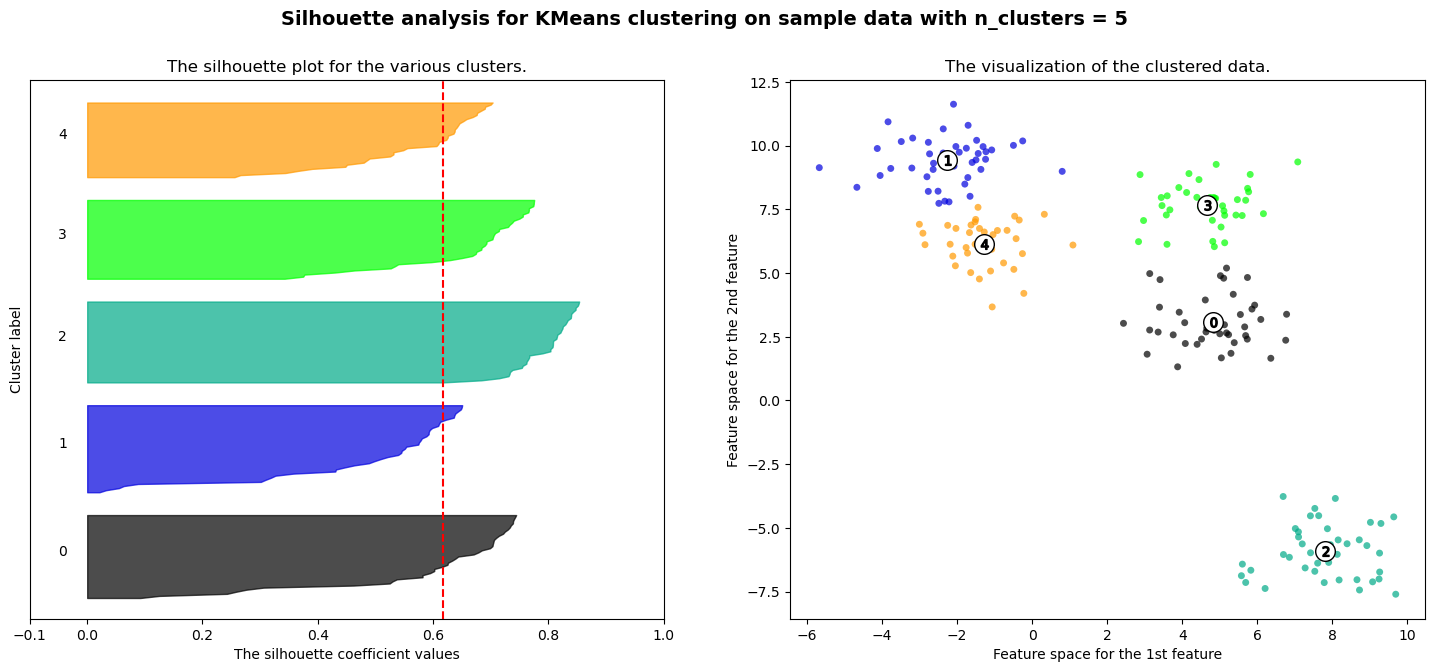

In [57]:
# 군집의 개수를 5라고 가정할 때 실루엣 스코어를 이용하여 군집 개수의 적절성 확인하기
k = 5

for n_clusters in [k]:
    # 화면에 두 개의 그래프를 그리기 위해 영역 나누기
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1번 그림 - 실루엣 계수 그리기
    # x축 범위 설정
    ax1.set_xlim([-0.1, 1])
    # y축 범위 설정, 군집별로 실루엣 계수 파악이 용이하도록 군집별 분리 표시
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # KMeans 메소드로 5개의 군집 만들기
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # 전체 데이터 샘플의 실루엣 스코어 평균을 구함
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # 개별 데이터 샘플의 실루엣 스코어(실루엣 계수를 구함)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # 실루엣 스코어와 군집별 산포도 시각화
    y_lower = 10
    for i in range(n_clusters):
        # 데이터 샘플의 실루엣 스코어를 군집별로 분리하고, 정렬하기
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        # 군집별 color map 설정
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # 1번 그림에 군집별 번호 표시
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 1번 그림 군집 간 상하 거리 조절
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 데이터 샘플의 실루엣 스코어 평균을 세로선으로 표시
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 1번 그림 y축 값 화면에서 숨기기
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2번 그림: 군집 형태 시각화
    # 군집별 색상 지정
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # 군집별로 시각화
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # 각 군집별 중심좌표(centroid) 표시
    centers = clusterer.cluster_centers_
    # 중심 좌표를 표시할 위치에 흰색 동그라미 그리기
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    # 흰색 동그라미 위에 군집 번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### 군집의 개수를 다양하게 변경하며 silhouette score를 확인하며 적절한 군집의 수를 결정

For n_clusters = 2 The average silhouette_score is : 0.6519940060133504
For n_clusters = 3 The average silhouette_score is : 0.6403222890988188
For n_clusters = 4 The average silhouette_score is : 0.644818543224489
For n_clusters = 5 The average silhouette_score is : 0.6178728799139864
For n_clusters = 6 The average silhouette_score is : 0.5626275454570022


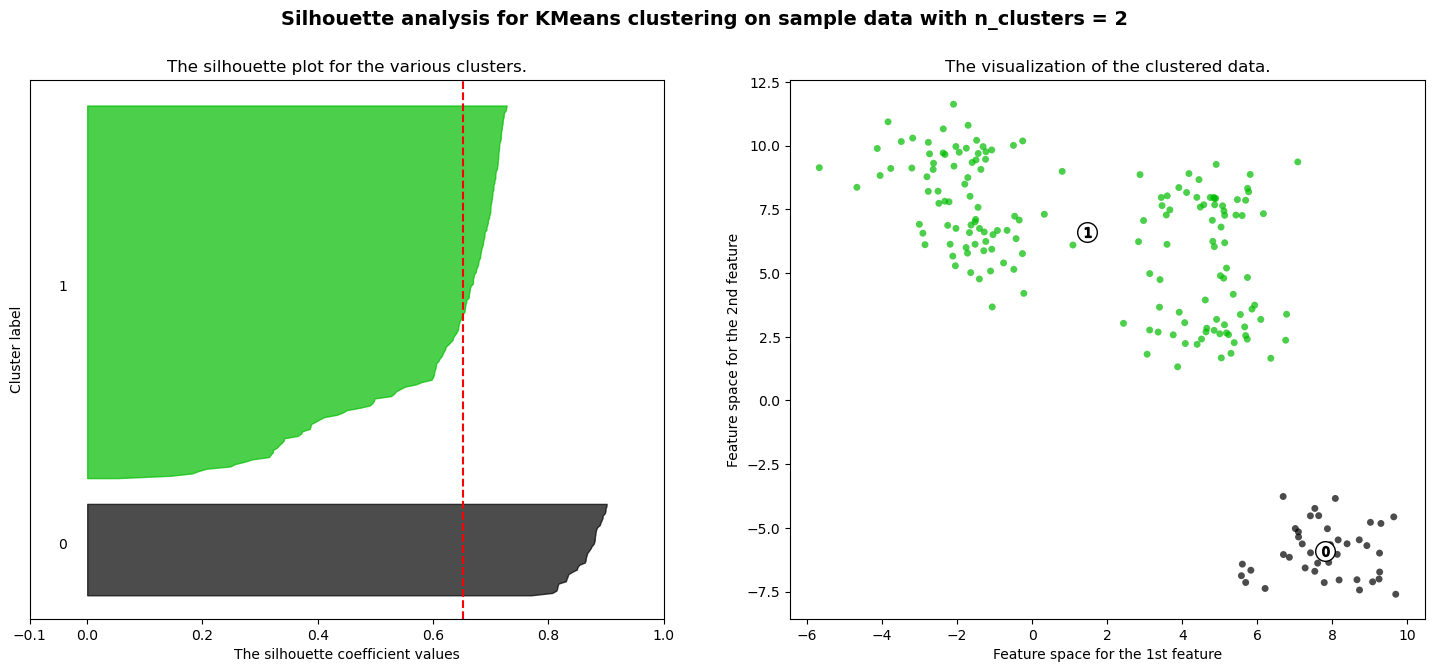

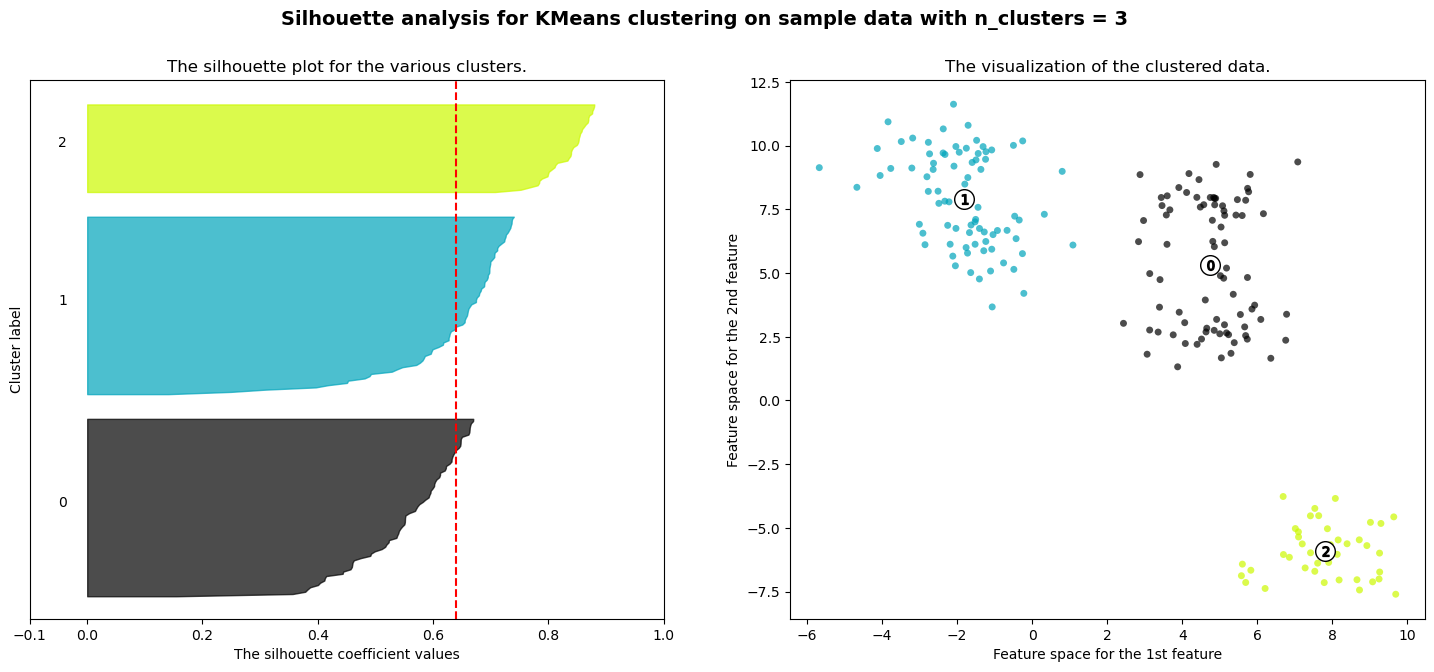

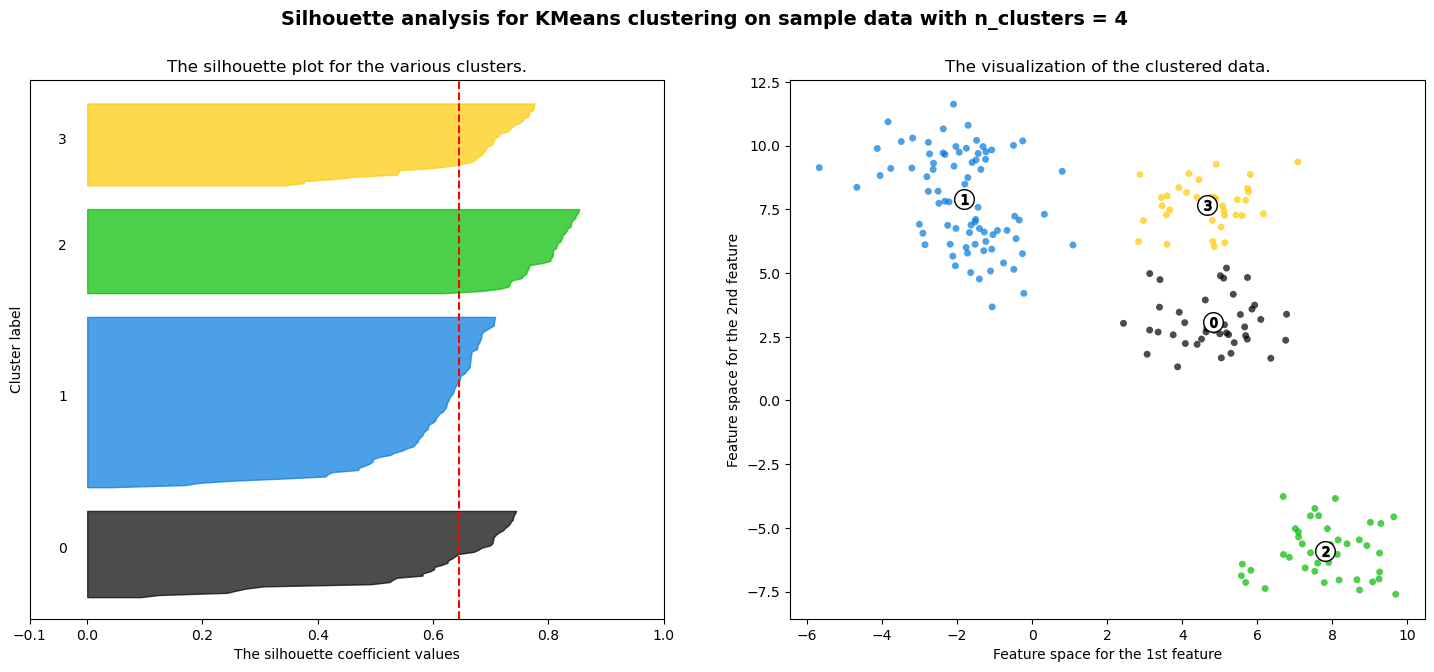

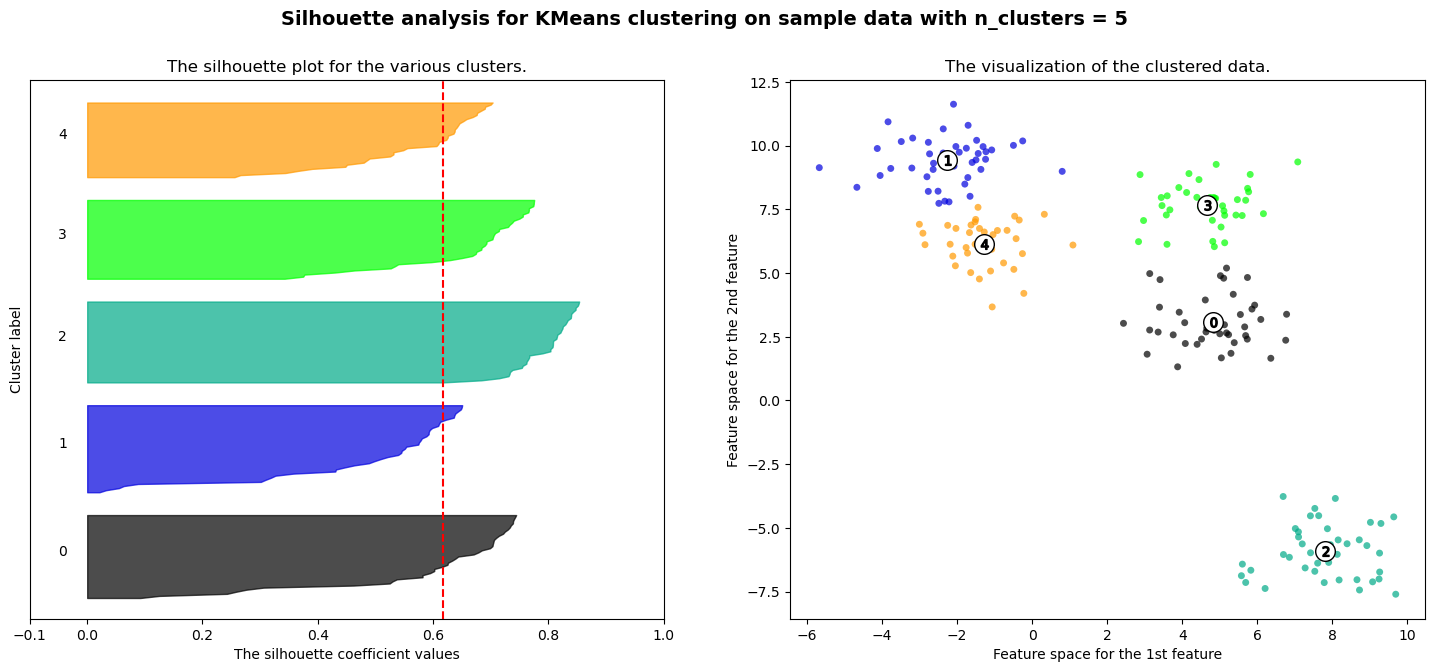

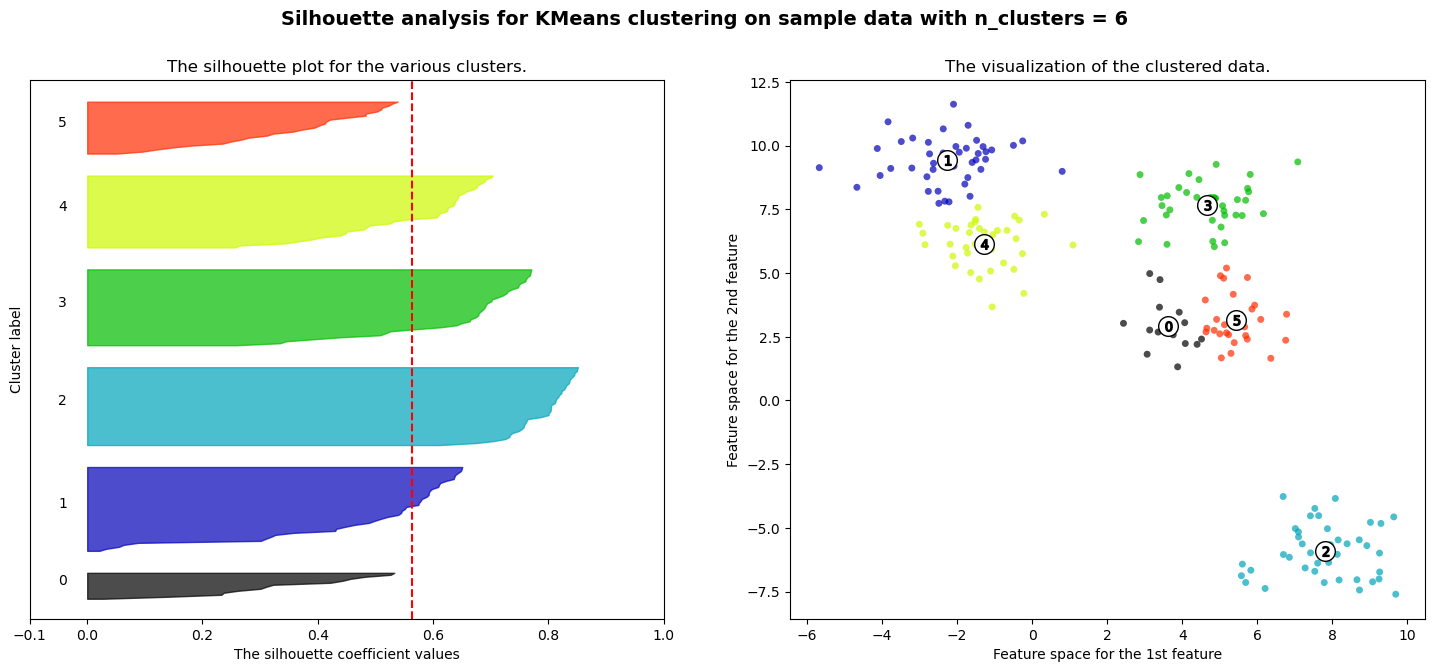

In [59]:
k_list = [ 2, 3, 4, 5, 6]

for n_clusters in k_list:
    # 화면에 두 개의 그래프를 그리기 위해 영역 나누기(그림1, 그림2)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1번 그림 - 실루엣 계수 그리기
    # x축 범위 설정
    ax1.set_xlim([-0.1, 1])
    # y축 범위 설정, 군집별로 실루엣 계수 파악이 용이하도록 군집별 상하 분리 표시
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 군집의 개수를 변경하면서 KMeans(n_clusters=n_clusters) KMeans 적용하기
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # 전체 데이터 샘플의 실루엣 스코어 평균을 구함
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # 개별 데이터 샘플의 실루엣 스코어(실루엣 계수를 구함)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # 실루엣 스코어와 군집별 산포도 시각화
    y_lower = 10
    for i in range(n_clusters):
        # 데이터 샘플의 실루엣 스코어를 군집별로 분리하고, 정렬하기
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        # 군집별 color map 설정
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # 1번 그림에 군집별 번호 표시
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 1번 그림 군집 간 상하 거리 조절
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 데이터 샘플의 실루엣 스코어 평균을 세로선으로 표시
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 1번 그림 y축 값 화면에서 숨기기
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2번 그림: 군집 형태 시각화
    # 군집별 색상 지정
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # 군집별로 시각화
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # 각 군집별 중심좌표(centroid) 표시
    centers = clusterer.cluster_centers_
    # 중심 좌표를 표시할 위치에 흰색 동그라미 그리기
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    # 흰색 동그라미 위에 군집 번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
### 여러 개의 군집 개수를 매개변수로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def show_silhouette(k_list, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 매개변수로 군집 개수 리스트를 입력받아 실루엣 계수를 구함
    n_cols = len(k_list)
    
    # 군집 개수만큼 시각화
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 군집 개수를 변경하면서 차례로 실루엣 계수 시각화
    for ind, n_cluster in enumerate(k_list):
        
        # KMeans 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

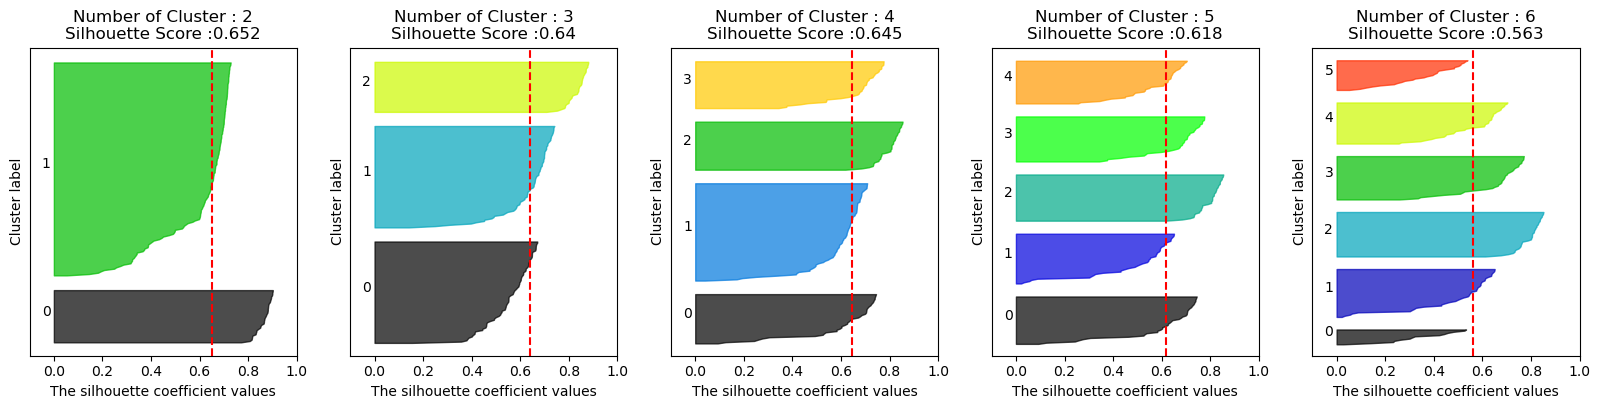

In [ ]:
# 데이터셋에 대한 군집 실루엣 평가 비교
X = df_k[["x1", "x2"]].values
show_silhouette([2, 3,4, 5, 6], X)
